In [1]:
!pip install RDKit

     --------------------------------------- 20.6/20.6 MB 10.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import MinMaxScaler
import joblib

import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
df_main = pd.read_excel("nanozymes.xlsx", index_col=0)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1 to 1178
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   formula          1178 non-null   object 
 1   activity         1178 non-null   object 
 2   Syngony          1005 non-null   float64
 3   length, nm       1162 non-null   float64
 4   width, nm        1162 non-null   float64
 5   depth, nm        1162 non-null   float64
 6   surface          1178 non-null   object 
 7   pol              1170 non-null   object 
 8   surf             1178 non-null   object 
 9   Mw(coat), g/mol  1105 non-null   float64
 10  Km, mM           1178 non-null   object 
 11  Vmax, mM/s       1178 non-null   object 
 12  ReactionType     1178 non-null   object 
 13  C min, mM        1163 non-null   float64
 14  C max, mM        1164 non-null   float64
 15  C(const), mM     1146 non-null   object 
 16  Ccat(mg/mL)      971 non-null    float64
 17  ph            

In [101]:
def prepare_main(df):
    
    df['Syngony'].fillna(0, inplace=True)
    df['length, nm'].fillna(0, inplace=True)
    df['width, nm'].fillna(0, inplace=True)
    df['depth, nm'].fillna(0, inplace=True)
    df['pol'].fillna(0, inplace=True)
    df['Mw(coat), g/mol'].fillna(0, inplace=True)
    df['C min, mM'].fillna(0, inplace=True)
    df['C max, mM'].fillna(0, inplace=True)
    df['C(const), mM'].fillna(0, inplace=True)
    df['Ccat(mg/mL)'].fillna(0, inplace=True)
    df['ph'].fillna(0, inplace=True)
    df['temp, °C'].fillna(0, inplace=True)
    
    df['Km, mM'] = pd.to_numeric(df['Km, mM'], errors='coerce')
    df['Vmax, mM/s'] = pd.to_numeric(df['Vmax, mM/s'], errors='coerce')
    df['C(const), mM'] = pd.to_numeric(df['C(const), mM'], errors='coerce')
    
    df['Km, mM'].fillna(0, inplace=True)
    df['Vmax, mM/s'].fillna(0, inplace=True)
    df['C(const), mM'].fillna(0, inplace=True)
    
    ##scaling
    #df['Vmax, mM/s'] = df['Vmax, mM/s'] * 1000.
    #df['Ccat(mg/mL)'] = df['Ccat(mg/mL)'] * 1000.
    
    return df

In [166]:
def apply_scale(df, filename, train=True):
    
    #scaler_main_columns = ['Syngony', 'length, nm','width, nm', 'depth, nm', 'Mw(coat), g/mol', 'Km, mM', 'Vmax, mM/s',
    #                      'C min, mM', 'C max, mM', 'C(const), mM', 'Ccat(mg/mL)', 'ph', 'temp, °C']
    scaler = MinMaxScaler()
    if train:
        df_out = scaler.fit_transform(df)
    else:
        df_out = scaler.transform(df)
    joblib.dump(scaler, filename)
    
    return scaler, df_out

In [106]:
prepare_main(df_main)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1 to 1178
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   formula          1178 non-null   object 
 1   activity         1178 non-null   object 
 2   Syngony          1178 non-null   float64
 3   length, nm       1178 non-null   float64
 4   width, nm        1178 non-null   float64
 5   depth, nm        1178 non-null   float64
 6   surface          1178 non-null   object 
 7   pol              1178 non-null   object 
 8   surf             1178 non-null   object 
 9   Mw(coat), g/mol  1178 non-null   float64
 10  Km, mM           1178 non-null   float64
 11  Vmax, mM/s       1178 non-null   float64
 12  ReactionType     1178 non-null   object 
 13  C min, mM        1178 non-null   float64
 14  C max, mM        1178 non-null   float64
 15  C(const), mM     1178 non-null   float64
 16  Ccat(mg/mL)      1178 non-null   float64
 17  ph            

In [107]:
df_rtypes = pd.read_excel("reaction_types.xlsx", index_col=0)
df_formulas = pd.read_excel("nanozymes_formulas.xlsx", index_col=0)
df_main_merged = df_main.merge(df_rtypes, left_on='ReactionType', right_on='formula', how='left')
df_main_merged = df_main_merged.merge(df_formulas, left_on='formula', right_on='formula', how='left')
df_main_merged.info()
df_main_merged.to_excel('main_merged.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1177
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   formula          1178 non-null   object 
 1   activity         1178 non-null   object 
 2   Syngony          1178 non-null   float64
 3   length, nm       1178 non-null   float64
 4   width, nm        1178 non-null   float64
 5   depth, nm        1178 non-null   float64
 6   surface          1178 non-null   object 
 7   pol              1178 non-null   object 
 8   surf             1178 non-null   object 
 9   Mw(coat), g/mol  1178 non-null   float64
 10  Km, mM           1178 non-null   float64
 11  Vmax, mM/s       1178 non-null   float64
 12  ReactionType     1178 non-null   object 
 13  C min, mM        1178 non-null   float64
 14  C max, mM        1178 non-null   float64
 15  C(const), mM     1178 non-null   float64
 16  Ccat(mg/mL)      1178 non-null   float64
 17  ph            

In [109]:
df_main_merged = df_main_merged.drop(columns=['formula', 'link','ReactionType','dec_ord_x', 'dec_ord_y', 'r_all', 'formula_all'])
df_main_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1177
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   activity         1178 non-null   object 
 1   Syngony          1178 non-null   float64
 2   length, nm       1178 non-null   float64
 3   width, nm        1178 non-null   float64
 4   depth, nm        1178 non-null   float64
 5   surface          1178 non-null   object 
 6   pol              1178 non-null   object 
 7   surf             1178 non-null   object 
 8   Mw(coat), g/mol  1178 non-null   float64
 9   Km, mM           1178 non-null   float64
 10  Vmax, mM/s       1178 non-null   float64
 11  C min, mM        1178 non-null   float64
 12  C max, mM        1178 non-null   float64
 13  C(const), mM     1178 non-null   float64
 14  Ccat(mg/mL)      1178 non-null   float64
 15  ph               1178 non-null   float64
 16  temp, °C         1178 non-null   float64
 17  rtype_0       

In [135]:
df_add = pd.read_excel("nanozymes_add.xlsx")
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Индекс            108 non-null    int64  
 1   Формула           108 non-null    object 
 2   Ссылка на статью  104 non-null    object 
 3   R1                108 non-null    object 
 4   M1, mg            108 non-null    float64
 5   V1, mL            108 non-null    float64
 6   С1, M             108 non-null    float64
 7   R2                108 non-null    object 
 8   M2, g             108 non-null    float64
 9   V2, mL            108 non-null    float64
 10  С2, M             108 non-null    float64
 11  solvent           108 non-null    object 
 12  Vsolv, мл         108 non-null    float64
 13  Csolv, M          108 non-null    float64
 14  add to solvent    108 non-null    object 
 15  Mad, g            108 non-null    float64
 16  Сad, моль/л       108 non-null    float64
 1

In [136]:
df_rs = pd.read_excel('Rs.xlsx')

In [137]:
df_merged = df_add.merge(df_rs, left_on='R1', right_on='formula', how='left', suffixes=(None,'_r1'))
df_merged = df_merged.merge(df_rs, left_on='R2', right_on='formula', how='left', suffixes=(None,'_r2'))
df_merged = df_merged.merge(df_rs, left_on='solvent', right_on='formula', how='left', suffixes=(None,'_solvent'))
df_merged = df_merged.merge(df_rs, left_on='add to solvent', right_on='formula', how='left', suffixes=(None,'_add_to_solvent'))
df_merged.to_excel('merged.xlsx')

In [138]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Индекс                  108 non-null    int64  
 1   Формула                 108 non-null    object 
 2   Ссылка на статью        104 non-null    object 
 3   R1                      108 non-null    object 
 4   M1, mg                  108 non-null    float64
 5   V1, mL                  108 non-null    float64
 6   С1, M                   108 non-null    float64
 7   R2                      108 non-null    object 
 8   M2, g                   108 non-null    float64
 9   V2, mL                  108 non-null    float64
 10  С2, M                   108 non-null    float64
 11  solvent                 108 non-null    object 
 12  Vsolv, мл               108 non-null    float64
 13  Csolv, M                108 non-null    float64
 14  add to solvent          108 non-null    ob

In [139]:
df_merged.set_index('Индекс', inplace=True)
df_merged = df_merged.drop(columns=['Формула', 'Ссылка на статью','R1','R2', 'solvent', 'add to solvent',
                                    'formula', 'dec_ord', 'r_all', 'formula_r2', 'dec_ord_r2', 'r_all_r2',
                                    'formula_solvent', 'dec_ord_solvent','r_all_solvent',
                                    'formula_add_to_solvent','dec_ord_add_to_solvent','r_all_add_to_solvent',
                                    #'Индекс'
                                   ])

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 28 to 170
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   M1, mg              108 non-null    float64
 1   V1, mL              108 non-null    float64
 2   С1, M               108 non-null    float64
 3   M2, g               108 non-null    float64
 4   V2, mL              108 non-null    float64
 5   С2, M               108 non-null    float64
 6   Vsolv, мл           108 non-null    float64
 7   Csolv, M            108 non-null    float64
 8   Mad, g              108 non-null    float64
 9   Сad, моль/л         108 non-null    float64
 10  heat                108 non-null    int64  
 11  autoclave           108 non-null    int64  
 12  pH adjustment       108 non-null    int64  
 13  r_0                 108 non-null    int64  
 14  r_1                 108 non-null    int64  
 15  r_2                 108 non-null    int64  
 16  r_3    

In [141]:
df_all = df_main_merged.merge(df_merged, left_index=True, right_index=True, how='inner')
df_all

,activity,Syngony,"length, nm","width, nm","depth, nm",surface,pol,surf,"Mw(coat), g/mol","Km, mM",...,r_4_solvent,r_5_solvent,r_6_solvent,r_0_add_to_solvent,r_1_add_to_solvent,r_2_add_to_solvent,r_3_add_to_solvent,r_4_add_to_solvent,r_5_add_to_solvent,r_6_add_to_solvent
28,peroxidase,7.0,104.0,27.0,27.0,naked,0,0,0.0,0.5090,...,1,1,0,0,1,1,1,1,1,1
29,peroxidase,7.0,200.0,200.0,200.0,naked,poly(ethylene oxide),ethylene glycol,20000.0,0.8500,...,1,1,0,0,1,1,1,1,1,1
36,peroxidase,1.0,66.0,66.0,66.0,naked,0,0,0.0,0.3800,...,1,1,0,0,1,0,0,1,0,0
37,peroxidase,2.0,5000.0,5000.0,1600.0,naked,0,0,0.0,1.1800,...,1,1,0,0,1,0,0,1,0,0
38,peroxidase,2.0,5000.0,5000.0,1600.0,naked,0,0,0.0,0.5900,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,peroxidase,6.0,25.0,25.0,25.0,poly(ethylene oxide),0,0,20000.0,0.5370,...,1,0,0,0,1,0,0,1,0,0
548,peroxidase,6.0,25.0,25.0,25.0,poly(ethylene oxide),0,0,20000.0,2.8120,...,1,0,0,0,1,0,0,1,0,0
549,peroxidase,7.0,90.0,90.0,5.0,naked,poly(N-Vinylpyrrolidone),0,29000.0,0.1317,...,1,0,0,0,1,0,0,1,0,0
550,peroxidase,7.0,90.0,90.0,5.0,naked,poly(N-Vinylpyrrolidone),0,29000.0,319.3000,...,1,0,0,0,1,0,0,1,0,0


In [142]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 28 to 735
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity            108 non-null    object 
 1   Syngony             108 non-null    float64
 2   length, nm          108 non-null    float64
 3   width, nm           108 non-null    float64
 4   depth, nm           108 non-null    float64
 5   surface             108 non-null    object 
 6   pol                 108 non-null    object 
 7   surf                108 non-null    object 
 8   Mw(coat), g/mol     108 non-null    float64
 9   Km, mM              108 non-null    float64
 10  Vmax, mM/s          108 non-null    float64
 11  C min, mM           108 non-null    float64
 12  C max, mM           108 non-null    float64
 13  C(const), mM        108 non-null    float64
 14  Ccat(mg/mL)         108 non-null    float64
 15  ph                  108 non-null    float64
 16  temp, °

In [143]:
df_dummies = pd.get_dummies(df_all)

In [148]:
df_dummies.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 28 to 735
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Syngony                        108 non-null    float64
 1   length, nm                     108 non-null    float64
 2   width, nm                      108 non-null    float64
 3   depth, nm                      108 non-null    float64
 4   Mw(coat), g/mol                108 non-null    float64
 5   Km, mM                         108 non-null    float64
 6   Vmax, mM/s                     108 non-null    float64
 7   C min, mM                      108 non-null    float64
 8   C max, mM                      108 non-null    float64
 9   C(const), mM                   108 non-null    float64
 10  Ccat(mg/mL)                    108 non-null    float64
 11  ph                             108 non-null    float64
 12  temp, °C                       108 non-null    fl

In [144]:
df_dummies.columns.values

array(['Syngony', 'length, nm', 'width, nm', 'depth, nm',
       'Mw(coat), g/mol', 'Km, mM', 'Vmax, mM/s', 'C min, mM',
       'C max, mM', 'C(const), mM', 'Ccat(mg/mL)', 'ph', 'temp, °C',
       'rtype_0', 'rtype_1', 'rtype_2', 'rtype_3', 'rtype_4', 'rtype_5',
       'formula_0', 'formula_1', 'formula_2', 'formula_3', 'formula_4',
       'formula_5', 'formula_6', 'formula_7', 'formula_8', 'M1, mg',
       'V1, mL', 'С1, M', 'M2, g', 'V2, mL', 'С2, M', 'Vsolv, мл',
       'Csolv, M', 'Mad, g', 'Сad, моль/л', 'heat', 'autoclave',
       'pH adjustment', 'r_0', 'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6',
       'r_0_r2', 'r_1_r2', 'r_2_r2', 'r_3_r2', 'r_4_r2', 'r_5_r2',
       'r_6_r2', 'r_0_solvent', 'r_1_solvent', 'r_2_solvent',
       'r_3_solvent', 'r_4_solvent', 'r_5_solvent', 'r_6_solvent',
       'r_0_add_to_solvent', 'r_1_add_to_solvent', 'r_2_add_to_solvent',
       'r_3_add_to_solvent', 'r_4_add_to_solvent', 'r_5_add_to_solvent',
       'r_6_add_to_solvent', 'activity_oxidase', 

In [145]:
columns_source = [
       'Syngony', 'length, nm', 'width, nm', 'depth, nm',
       'Mw(coat), g/mol', 'Km, mM', 'Vmax, mM/s', 'C min, mM',
       'C max, mM', 'C(const), mM', 'Ccat(mg/mL)', 'ph', 'temp, °C',
    'rtype_0', 'rtype_1', 'rtype_2', 'rtype_3', 'rtype_4', 'rtype_5',
       'formula_0', 'formula_1', 'formula_2', 'formula_3', 'formula_4',
       'formula_5', 'formula_6', 'formula_7', 'formula_8',
    'activity_oxidase', 'activity_peroxidase',
       'surface_chitosan', 'surface_naked',
       'surface_poly(ethylene oxide)', 'pol_0',
       'pol_poly(N-Vinylpyrrolidone)', 'pol_poly(N-Vinylpyrrolidone) ',
       'pol_poly(ethylene oxide)', 'pol_therabloat', 'surf_0',
       'surf_Glutathione', 'surf_citric acid', 'surf_ethylene glycol'
    

                 ]

In [146]:
columns_target = ['M1, mg',
       'V1, mL', 'С1, M', 'M2, g', 'V2, mL', 'С2, M', 'Vsolv, мл',
       'Csolv, M', 'Mad, g', 'Сad, моль/л', 'heat', 'autoclave',
       'pH adjustment', 'r_0', 'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6',
       'r_0_r2', 'r_1_r2', 'r_2_r2', 'r_3_r2', 'r_4_r2', 'r_5_r2',
       'r_6_r2', 'r_0_solvent', 'r_1_solvent', 'r_2_solvent',
       'r_3_solvent', 'r_4_solvent', 'r_5_solvent', 'r_6_solvent',
       'r_0_add_to_solvent', 'r_1_add_to_solvent', 'r_2_add_to_solvent',
       'r_3_add_to_solvent', 'r_4_add_to_solvent', 'r_5_add_to_solvent',
       'r_6_add_to_solvent',
                  
    
]

In [147]:
len(columns_source), len(columns_target)

(42, 41)

In [149]:
inp_len = len(columns_source)
out_len = len(columns_target)

In [155]:
df_input = df_dummies[columns_source].to_numpy()
df_target = df_dummies[columns_target].to_numpy()

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(df_input, df_target,
                                                    test_size=0.15, random_state=42)

In [172]:
X_train.shape, X_test.shape

((91, 42), (17, 42))

In [173]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
Y_train_scaled = Y_scaler.fit_transform(Y_train)

X_test_scaled = X_scaler.transform(X_test)
Y_test_scaled = Y_scaler.transform(Y_test)

joblib.dump(X_scaler, 'x_scaler')
joblib.dump(Y_scaler, 'y_scaler')

['y_scaler']

In [176]:
def nanozymes_linear(inp_len, out_len):
      
    input = Input(inp_len)
    inner_1 = Dense(inp_len*2)(input)
    inner_1 = Activation('relu')(inner_1)
    inner_2 = Dense(inp_len*2)(inner_1)
    inner_2 = Activation('relu')(inner_2)
    out = Dense(out_len)(inner_2)
    ##out = Activation('gelu')(out)
    
    model = Model(input, out)
    model.summary()
    
    return model

In [158]:
def plot_history(history):
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()

In [177]:
model = nanozymes_linear(inp_len, out_len)
model.compile(optimizer=Adamax(learning_rate=1e-4), loss='mse')
history = model.fit(X_train_scaled, Y_train_scaled,
                   epochs=30,
                   validation_data=(X_test_scaled, Y_test_scaled),
                   batch_size=1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense_9 (Dense)             (None, 84)                3612      
                                                                 
 activation_6 (Activation)   (None, 84)                0         
                                                                 
 dense_10 (Dense)            (None, 84)                7140      
                                                                 
 activation_7 (Activation)   (None, 84)                0         
                                                                 
 dense_11 (Dense)            (None, 41)                3485      
                                                                 
Total params: 14,237
Trainable params: 14,237
Non-trainable

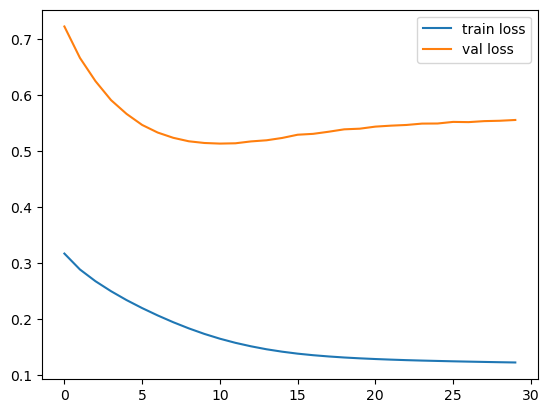

In [178]:
plot_history(history)

In [330]:
data_test = data_input[:1]
data_res = model.predict(data_test)

1/1 [==============================] - 0s 98ms/step


In [331]:
data_res

array([[-6.3533101e+00,  2.7528050e+00, -9.4172993e+00, -1.5686574e+01,
        -4.5034761e+00,  9.8992765e-01,  8.2287506e+01,  4.5065856e+00,
        -8.5348568e+00, -8.1423044e+00,  1.5383647e+02,  2.1578336e+00,
        -9.2442303e+00, -1.7025038e+01,  3.2473572e+01,  2.6114137e+00,
         1.4262637e+00, -3.2929928e+00, -2.3047171e+00,  2.2441793e+01,
         4.4505177e+01,  1.9927767e+01,  1.7300201e+01,  1.4772247e+01,
         2.0463070e+01, -2.5333277e+01,  1.7041636e+01,  2.3808336e+01,
        -5.1257973e+00, -8.9275589e+00,  2.7593903e+01,  1.3876040e+01,
         5.6135583e+00, -3.7117775e+01,  3.7315292e+00, -4.4305162e+00,
         1.7044205e+01, -8.4447473e-01,  2.0376350e+01,  8.5478773e+00,
        -3.9348409e+00,  3.9029255e+00,  6.6746168e+00, -9.6616817e-01,
        -2.7853651e+01, -1.9357822e+01,  6.9268522e+00,  1.3138634e+01,
         2.4731727e+00, -2.0827391e+01,  1.7770119e+01,  1.2045718e+01,
        -5.4319415e+00, -7.3241043e-01, -2.0207237e+01,  8.78543

In [179]:
data_target[:1]

array([[0.02023121, 0.        , 0.025     , 0.08      , 0.        ,
        0.15151515, 0.02      , 0.        , 0.        , 0.05208333,
        0.51289398, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]])

In [186]:
X_train[1]

array([7.000e+00, 9.000e+01, 9.000e+01, 5.000e+00, 2.900e+04, 3.193e+02,
       6.794e-02, 1.000e-03, 2.000e+03, 2.000e-01, 2.000e-03, 3.000e+00,
       4.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [187]:
X_train_scaled[1]

array([1.00000000e+00, 1.77387185e-02, 1.77387185e-02, 1.22387592e-03,
       1.00000000e+00, 5.84144432e-01, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e-04, 6.66666667e-04, 5.00000000e-01,
       8.88888889e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])